<a href="https://www.kaggle.com/code/eavprog/abscur2?scriptVersionId=163871670" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Оглавление проекта "Абсолютный валютный курс" 

![Проект \"Абсолютный валютный курс\"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:

Kaggle (расчёт): https://www.kaggle.com/code/eavprog/abscur2

Книга (данные): https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=449604484

Блог (новости): http://www.abscur.ru

Сайт (демонстрация): https://prog815.github.io/abscur2

ВКонтакте (обсуждение): https://vk.com/abscur

WhatsUp (новости): https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber (новости): https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram (обсуждение): https://t.me/AbsCur

Одноклассники (обсуждение): https://ok.ru/group/53547043520717

GitHub (код): https://github.com/prog815/abscur

YouTube (новости): https://www.youtube.com/@eavprog8/community

Smart-lab (обсуждение): https://smart-lab.ru/my/eavpred/

VC (обсуждение): https://vc.ru/u/262921-aleksey-enin

In [1]:
from lib_av import get_currency_exchange_daily_full

In [2]:
import pandas as pd
import os
import shutil
import numpy as np
import random
import time
from datetime import datetime, timedelta, time
import matplotlib.pyplot as plt
from lib_gss_abscur2 import post_df_to_ssh

# Список валютных пар

In [3]:
pairs = """AUDHKD
AUDJPY
AUDSEK
AUDUSD
CADJPY
CADSEK
CHFAUD
CHFHKD
CHFJPY
EURAUD
EURCAD
EURCHF
EURCNY
EURCZK
EURGBP
EURHKD
EURILS
EURJPY
EURNOK
EURNZD
EURRUB
EURSEK
EURSGD
EURUSD
EURZAR
GBPAUD
GBPCAD
GBPCHF
GBPHKD
GBPJPY
GBPNOK
GBPRUB
GBPSEK
GBPSGD
GBPUSD
HKDSEK
HKDSGD
JPYHKD
JPYSEK
NZDSEK
NZDUSD
SGDAUD
SGDCHF
SGDJPY
USDAED
USDARS
USDBRL
USDCAD
USDCHF
USDCLP
USDCNY
USDCOP
USDCZK
USDDKK
USDEGP
USDGBP
USDHKD
USDHUF
USDIDR
USDILS
USDINR
USDISK
USDJPY
USDKRW
USDKWD
USDKZT
USDMXN
USDMYR
USDNOK
USDPEN
USDPHP
USDPKR
USDPLN
USDQAR
USDRON
USDRUB
USDSAR
USDSEK
USDSGD
USDTHB
USDTRY
USDTWD
USDUAH
USDVND
USDZAR""".split()
pairs = sorted(pairs)
print(pairs)
print(len(pairs))

['AUDHKD', 'AUDJPY', 'AUDSEK', 'AUDUSD', 'CADJPY', 'CADSEK', 'CHFAUD', 'CHFHKD', 'CHFJPY', 'EURAUD', 'EURCAD', 'EURCHF', 'EURCNY', 'EURCZK', 'EURGBP', 'EURHKD', 'EURILS', 'EURJPY', 'EURNOK', 'EURNZD', 'EURRUB', 'EURSEK', 'EURSGD', 'EURUSD', 'EURZAR', 'GBPAUD', 'GBPCAD', 'GBPCHF', 'GBPHKD', 'GBPJPY', 'GBPNOK', 'GBPRUB', 'GBPSEK', 'GBPSGD', 'GBPUSD', 'HKDSEK', 'HKDSGD', 'JPYHKD', 'JPYSEK', 'NZDSEK', 'NZDUSD', 'SGDAUD', 'SGDCHF', 'SGDJPY', 'USDAED', 'USDARS', 'USDBRL', 'USDCAD', 'USDCHF', 'USDCLP', 'USDCNY', 'USDCOP', 'USDCZK', 'USDDKK', 'USDEGP', 'USDGBP', 'USDHKD', 'USDHUF', 'USDIDR', 'USDILS', 'USDINR', 'USDISK', 'USDJPY', 'USDKRW', 'USDKWD', 'USDKZT', 'USDMXN', 'USDMYR', 'USDNOK', 'USDPEN', 'USDPHP', 'USDPKR', 'USDPLN', 'USDQAR', 'USDRON', 'USDRUB', 'USDSAR', 'USDSEK', 'USDSGD', 'USDTHB', 'USDTRY', 'USDTWD', 'USDUAH', 'USDVND', 'USDZAR']
85


# Список валют

In [4]:
curs = set()

for pair in pairs:
    curs.add(pair[:3])
    curs.add(pair[3:])

curs = sorted(list(curs))

print(curs)
print(len(curs))

['AED', 'ARS', 'AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'COP', 'CZK', 'DKK', 'EGP', 'EUR', 'GBP', 'HKD', 'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JPY', 'KRW', 'KWD', 'KZT', 'MXN', 'MYR', 'NOK', 'NZD', 'PEN', 'PHP', 'PKR', 'PLN', 'QAR', 'RON', 'RUB', 'SAR', 'SEK', 'SGD', 'THB', 'TRY', 'TWD', 'UAH', 'USD', 'VND', 'ZAR']
45


# Загрузка валютных пар

В тетрадке реализована загрузка исторических курсов для 85 валютных пар, торгуемых на Forex. Все курсы сохраняются в каталоге pairs тетрадки. 

In [5]:
# копирование предыдущих
! mkdir pairs
! cp -rf /kaggle/input/abscur2/pairs/*.csv ./pairs

In [ ]:
# Непосредственно загрузка

for pair in pairs[:]:
    for n in range(3):
        try:
            df = get_currency_exchange_daily_full(pair)
            df.to_csv("./pairs/" + pair + ".csv")
            print(pair, "- загружена. С " + str(df.index.min().date()) + ". По " + str(df.index.max().date()) + ". Строк " + str(df.shape[0]) + ".")
            break
        except Exception as e:
            print(pair, "- ошибка загрузки")
            time.sleep(5)

# Соединяем парные курсы в одну таблицу

Собирается таблица с курсами закрытий всех загруженных валютных пар, которая сохраняется в тетрадке под именем `pairs_close.csv`. Все сохраненные в тетрадке файлы доступны для скачивания без ограничений. 

Таблица с курсами закрытий парных валютных курсов выкладывается на листе в Google Docs по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=302188018.

Графики парных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/blog-page_54.html и на сайте по адресу https://prog815.github.io/abscur2/pair.html.

In [6]:
pairs_close = pd.DataFrame(columns=["Date"])
pairs_close.set_index('Date', inplace=True)

max_start_date = pd.to_datetime('1900-01-01').date()

for pair in pairs[:]:
    df = pd.read_csv("./pairs/" + pair + ".csv",index_col="Date")
    
    # исправляем ошибки поставщика котировок при превышении закрытия над максимум в дне
    idx = df.Close > df.High
    df.loc[idx,'Close'] = df[idx].High
    
    # исправляем ошибки поставщика котировок при превышении минимума над закрытием в дне
    idx = df.Close < df.Low
    df.loc[idx,'Close'] = df[idx].Low
    
    df.rename(columns={'Close': pair}, inplace=True)
    max_start_date = max(max_start_date, pd.to_datetime(df.index.min()).date())
    pairs_close = pairs_close.join(df[[pair]], how='outer')
    
pairs_close = pairs_close[pd.to_datetime(pairs_close.index).date >= max_start_date]
df.sort_index(inplace=True)
pairs_close.fillna(method='ffill',inplace=True)
pairs_close.fillna(method='bfill',inplace=True)

# ограничиваемся вчерашним днем
yesterday = (datetime.today() - timedelta(days=1)).date() if datetime.today().time() < time(12,0,0) else datetime.today().date()
pairs_close = pairs_close[pd.to_datetime(pairs_close.index) <= pd.to_datetime(yesterday)]

# сохранем на диск
pairs_close.to_csv("pairs_close.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Парные валютные курсы",pairs_close)

pairs_close

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,6.6777,101.899,6.4085,0.86124,104.827,6.5935,1.20040,8.0207,122.364,1.44409,...,44.9400,3.7515,7.44410,1.30274,32.820,2.22920,30.975,15.0605,21285.0,11.02017
2014-11-25,6.6144,100.600,6.3335,0.85324,104.712,6.5940,1.21500,8.0410,122.274,1.46174,...,46.3139,3.7514,7.42460,1.30009,32.800,2.21880,30.932,15.0070,21370.0,10.94715
2014-11-26,6.6196,100.405,6.3140,0.85385,104.501,6.5725,1.21770,8.0646,122.314,1.46442,...,47.3936,3.7523,7.39740,1.29763,32.740,2.20960,30.895,14.9730,21380.0,10.94944
2014-11-27,6.6055,100.439,6.3360,0.85216,103.925,6.5544,1.21550,8.0336,122.195,1.46176,...,49.0969,3.7523,7.43510,1.29889,32.770,2.20600,30.895,14.9730,21380.0,10.97230
2014-11-28,6.5938,100.900,6.3270,0.85025,103.908,6.5150,1.21760,8.0347,122.860,1.46337,...,50.4738,3.7528,7.44610,1.30275,32.830,2.21980,30.980,14.9690,21300.0,10.97230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-18,5.1025,98.083,6.8114,0.65279,111.347,7.7317,1.73514,8.8776,170.448,1.64942,...,91.9882,3.7485,10.43294,1.34570,35.980,30.82620,31.354,37.9484,24510.0,18.82511
2024-02-19,5.1128,98.162,6.7996,0.65397,111.260,7.7066,1.73222,8.8632,170.105,1.64740,...,92.3515,3.7482,10.39921,1.34532,36.010,30.81210,31.385,37.9484,24520.0,18.93931
2024-02-20,5.1195,98.234,6.7806,0.65488,110.919,7.6573,1.73081,8.8673,170.068,1.65011,...,92.3519,3.7482,10.36203,1.34340,35.960,30.88140,31.429,38.2847,24525.0,18.90210


# Последние парные валютные курсы 

Собирается таблица с последними парными валютными курсами закрытий всех загруженных валютных пар, которая сохраняется в тетрадке под именем `pairs_last.csv`. Все сохраненные в тетрадке файлы доступны для скачивания без ограничений. 

Таблица с курсами закрытий парных валютных курсов выкладывается на листе в Google Docs по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=1907887665.

Таблицы последних парных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/blog-page_52.html и на сайте по адресу https://prog815.github.io/abscur2/pairs_last.html.

In [7]:
pairs_last = pairs_close.iloc[[-1],:].T
pairs_last.index.name = "Валютные пары"
pairs_last.columns = ['Курс на ' + pairs_last.columns[0]]

# сохранем на диск
pairs_last.to_csv("pairs_last.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Последние парные валютные курсы",pairs_last)

pairs_last

,Курс на 2024-02-22
Валютные пары,
AUDHKD,5.12220
AUDJPY,98.45200
AUDSEK,6.78210
AUDUSD,0.65495
CADJPY,111.30000
...,...
USDTRY,31.00383
USDTWD,31.44200
USDUAH,38.47560


# Расчет абсолютных курсов

Делаем на примере расчета абсолютных курсов апроксимацией в тетрадке https://www.kaggle.com/code/eavprog/abscur-approks

Любой парный валютный курс можно представить как отношение двух абсолютных валютных курсов.
$$
EURUSD = \frac{EUR}{USD}
$$

Сначала собираем матрицу перехода между парными и абсолютными курсами. Она состоит нолей, единиц и минус единиц. Горизонтали соотвествуют парным валютным курсам. Вертикали соотвествуют конкретным валютам. Ноль означет отсутствие связи между валютной парой и валютой. Единица означает что валюта в числителе. Минус единица означает что валюта в знаменателе.

In [8]:
# Строим матрицу перехода от абсолютныых курсов к парным
M = np.zeros([len(pairs),len(curs)])
for pair in pairs:
    cur1,cur2 = pair[:3],pair[3:]
    pair_index = pairs.index(pair)
    cur1_index = curs.index(cur1)
    cur2_index = curs.index(cur2)
    M[pair_index,cur1_index] = 1
    M[pair_index,cur2_index] = -1
M 

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0., -1.]])

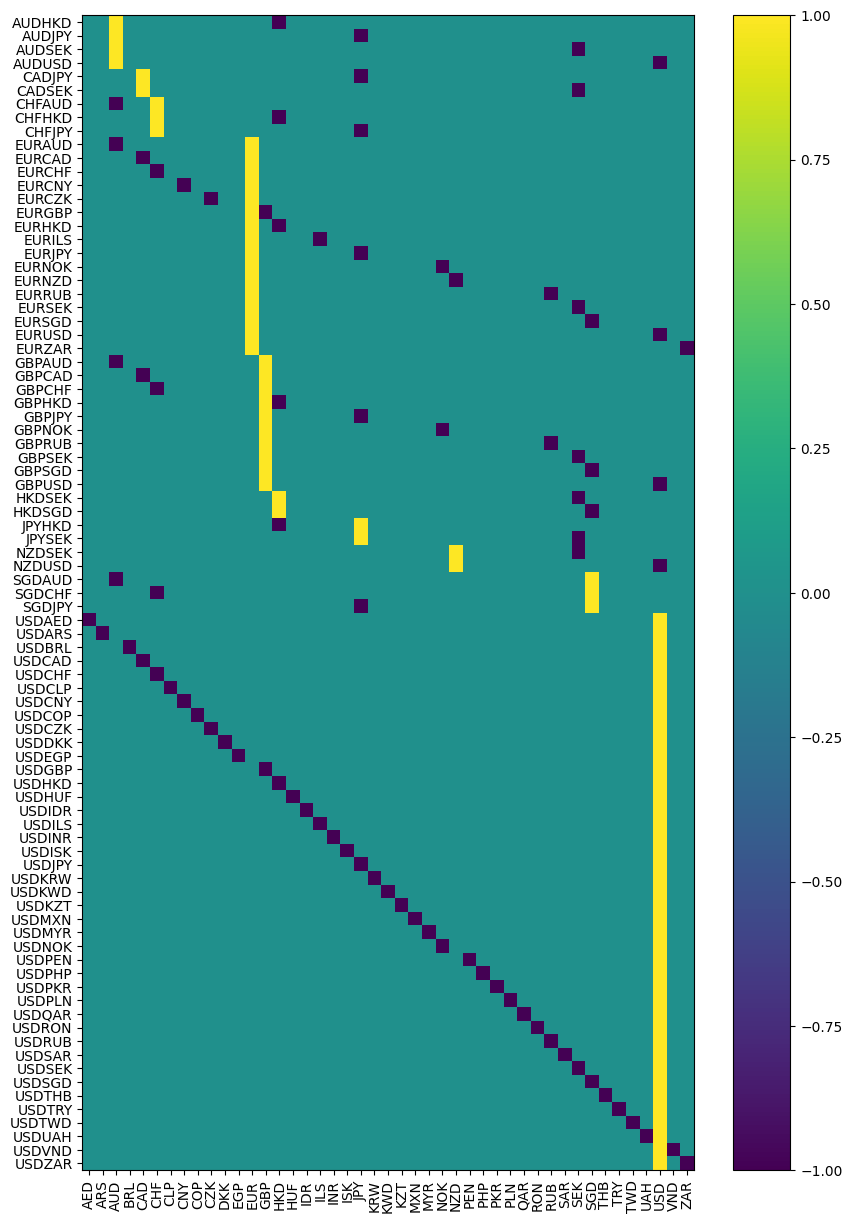

In [9]:
# выводим матрицу
plt.figure(figsize=(10,15))
plt.imshow(M, cmap='viridis', interpolation='none')
plt.xticks(np.arange(len(curs)), curs, rotation=90)
plt.yticks(np.arange(len(pairs)), pairs)
plt.colorbar()
plt.show()

Считаем абсолютные курсы аппроксимацией¶

В каждом дне решаем уравнение методом наименьших квадратов и получем абсолютный курс для каждой валюты. В цикле проходим по всем дням.

Результирующая таблица сохраняется под именем `abscur.csv`.

Кроме того таблица сохраняется в Google Drive по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=2038786153.

Графики абсолютных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/2.html и на сайте по адресу https://prog815.github.io/abscur2/abs.html.

In [10]:
abscur = pd.DataFrame(columns=curs,index=pd.to_datetime(pairs_close.index), dtype='float64')
for i in range(pairs_close.shape[0]):
    lnA, _, _, _ = np.linalg.lstsq(M, np.log(pairs_close.iloc[i,:].values), rcond=None)
    abscur.iloc[i,:] = np.exp(lnA)

# сохранем на диск
abscur.to_csv("abscur.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Абсолютные валютные курсы",abscur)

abscur

,AED,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,CZK,...,SAR,SEK,SGD,THB,TRY,TWD,UAH,USD,VND,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,3.844518,1.658358,12.390829,5.553949,12.399395,15.941522,0.023708,2.300061,0.006569,0.636939,...,3.764072,1.113238,11.841631,0.430253,6.334521,0.455881,0.937613,14.120915,0.000663,1.281469
2014-11-25,3.845277,1.658640,12.274498,5.588745,12.428564,15.983609,0.023587,2.301984,0.006514,0.638935,...,3.764812,1.115938,11.867008,0.430589,6.365295,0.456592,0.941115,14.123317,0.000661,1.289758
2014-11-26,3.841785,1.656161,12.274713,5.648943,12.426178,16.020454,0.023566,2.299042,0.006521,0.639952,...,3.760492,1.119236,11.879226,0.430986,6.385995,0.456724,0.942396,14.110494,0.000660,1.288170
2014-11-27,3.851964,1.660549,12.286816,5.598243,12.364476,16.011038,0.023552,2.305083,0.006543,0.638613,...,3.770455,1.116608,11.902445,0.431733,6.413364,0.457934,0.944893,14.147880,0.000662,1.289371
2014-11-28,3.865651,1.665036,12.301025,5.617981,12.319168,16.058512,0.023354,2.311722,0.006405,0.640320,...,3.783245,1.118401,11.898828,0.432463,6.395964,0.458288,0.948478,14.197762,0.000667,1.291029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-18,5.977324,0.026291,14.337689,4.421445,16.276178,24.916974,0.022646,3.068982,0.005620,0.930846,...,5.856454,2.105277,16.300395,0.610142,0.712151,0.700163,0.578494,21.952918,0.000896,1.164361
2024-02-19,5.977733,0.026239,14.357762,4.429510,16.270389,24.878854,0.022647,3.068879,0.005607,0.929717,...,5.857324,2.112485,16.309329,0.609676,0.712526,0.699520,0.578534,21.954421,0.000895,1.159168
2024-02-20,5.975551,0.026215,14.373937,4.453984,16.229918,24.888464,0.022800,3.053374,0.005591,0.935196,...,5.855345,2.119509,16.334114,0.610317,0.710687,0.698304,0.573258,21.947005,0.000895,1.161117


# Ошибка восстановления пар

А теперь попробуем обратно восстановить валютные пары из абсолютных курсов и посмотреть на погрешность.

In [11]:
pairs_delta = pairs_close.copy()
for pair in pairs_delta.columns:
    abs1, abs2 = pair[:3], pair[3:]
    pairs_delta[pair] = (pairs_close[pair].values - abscur[abs1].values / abscur[abs2].values) / pairs_close[pair].values
    

# сохранем на диск
pairs_delta.to_csv("pairs_delta.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Относительная ошибка восстановления пары",pairs_delta)
    
pairs_delta

Валютные пары,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,-0.001051,0.366984,-0.736825,-0.018857,0.384240,-0.689260,-0.071774,-0.072260,0.321796,0.019251,...,0.004680,2.604282e-15,-0.703973,0.084637,3.247453e-15,4.980365e-15,5.390720e-15,3.538442e-15,-2.051010e-15,0.000077
2014-11-25,-0.001003,0.366998,-0.736680,-0.018582,0.384222,-0.689009,-0.071753,-0.072228,0.321827,0.018909,...,0.007941,5.918980e-16,-0.704604,0.084577,1.299773e-15,1.801335e-15,-1.148556e-16,4.734742e-16,-3.915466e-15,-0.000294
2014-11-26,-0.000878,0.366942,-0.736941,-0.018797,0.384250,-0.689216,-0.071823,-0.072244,0.321756,0.019081,...,0.006085,2.011970e-15,-0.704281,0.084616,1.519181e-15,1.205890e-15,2.874829e-15,1.423648e-15,-2.892687e-15,-0.000408
2014-11-27,-0.000789,0.366963,-0.736694,-0.019124,0.384330,-0.689436,-0.072075,-0.072305,0.321955,0.019172,...,0.001236,1.420214e-15,-0.704134,0.084870,1.734618e-15,3.422265e-15,2.299863e-15,2.372747e-15,5.104741e-16,-0.000036
2014-11-28,-0.001009,0.367314,-0.738385,-0.019001,0.384723,-0.690711,-0.072159,-0.072428,0.321683,0.018541,...,0.012754,1.656696e-15,-0.704879,0.084086,1.947878e-15,3.400990e-15,1.949520e-15,1.424028e-15,2.903551e-15,-0.002273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-18,-0.000699,-0.000540,0.000153,-0.000492,-0.000513,0.000073,-0.001571,0.000445,-0.000581,0.000502,...,0.000112,3.791078e-15,0.000515,-0.000797,3.752171e-15,4.148993e-15,3.739222e-15,4.493740e-15,7.421417e-16,-0.001537
2024-02-19,0.000037,-0.001116,0.000438,-0.000016,-0.000922,0.000595,-0.000324,0.000470,-0.001047,0.000234,...,-0.000731,-7.108840e-16,0.000626,-0.000600,1.381227e-15,1.729538e-15,1.131978e-15,1.872392e-15,-1.483678e-15,-0.000026
2024-02-20,0.000054,-0.000544,-0.000167,-0.000089,-0.000536,-0.000013,-0.000398,0.000380,-0.000686,-0.000124,...,0.000125,6.042514e-15,0.000701,-0.000171,4.149443e-15,4.026533e-15,3.730298e-15,5.011050e-15,5.933503e-16,0.000024


In [12]:
pairs_delta_stat = pairs_delta.describe().T

# сохранем на диск
pairs_delta_stat.to_csv("pairs_delta_stat.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Статистика ошибки восстановления пар",pairs_delta_stat)

pairs_delta_stat

,count,mean,std,min,25%,50%,75%,max
Валютные пары,,,,,,,,
AUDHKD,2896.0,-2.798451e-04,4.866380e-04,-2.474771e-03,-7.835107e-04,-6.593220e-05,1.051307e-04,8.401368e-04
AUDJPY,2896.0,8.093333e-02,1.527497e-01,-4.253157e-03,-7.110665e-04,-5.578933e-04,-3.544182e-05,3.681008e-01
AUDSEK,2896.0,-1.637055e-01,3.062326e-01,-7.420207e-01,-1.062956e-03,-2.991278e-04,7.572276e-05,3.329552e-03
AUDUSD,2896.0,-4.566080e-03,7.944801e-03,-2.246397e-02,-1.357116e-03,-3.364520e-04,-1.128431e-04,4.877034e-03
CADJPY,2896.0,8.488209e-02,1.599427e-01,-3.456115e-03,-6.300392e-04,-4.602757e-04,7.402245e-05,3.856057e-01
...,...,...,...,...,...,...,...,...
USDTRY,2896.0,3.726960e-15,1.852489e-15,-2.175561e-15,2.482235e-15,3.789357e-15,5.002138e-15,9.818021e-15
USDTWD,2896.0,3.449410e-15,1.706800e-15,-2.861031e-15,2.309488e-15,3.453498e-15,4.620494e-15,9.808066e-15
USDUAH,2896.0,3.109756e-15,1.612709e-15,-3.405070e-15,2.036683e-15,3.170318e-15,4.176071e-15,8.665155e-15


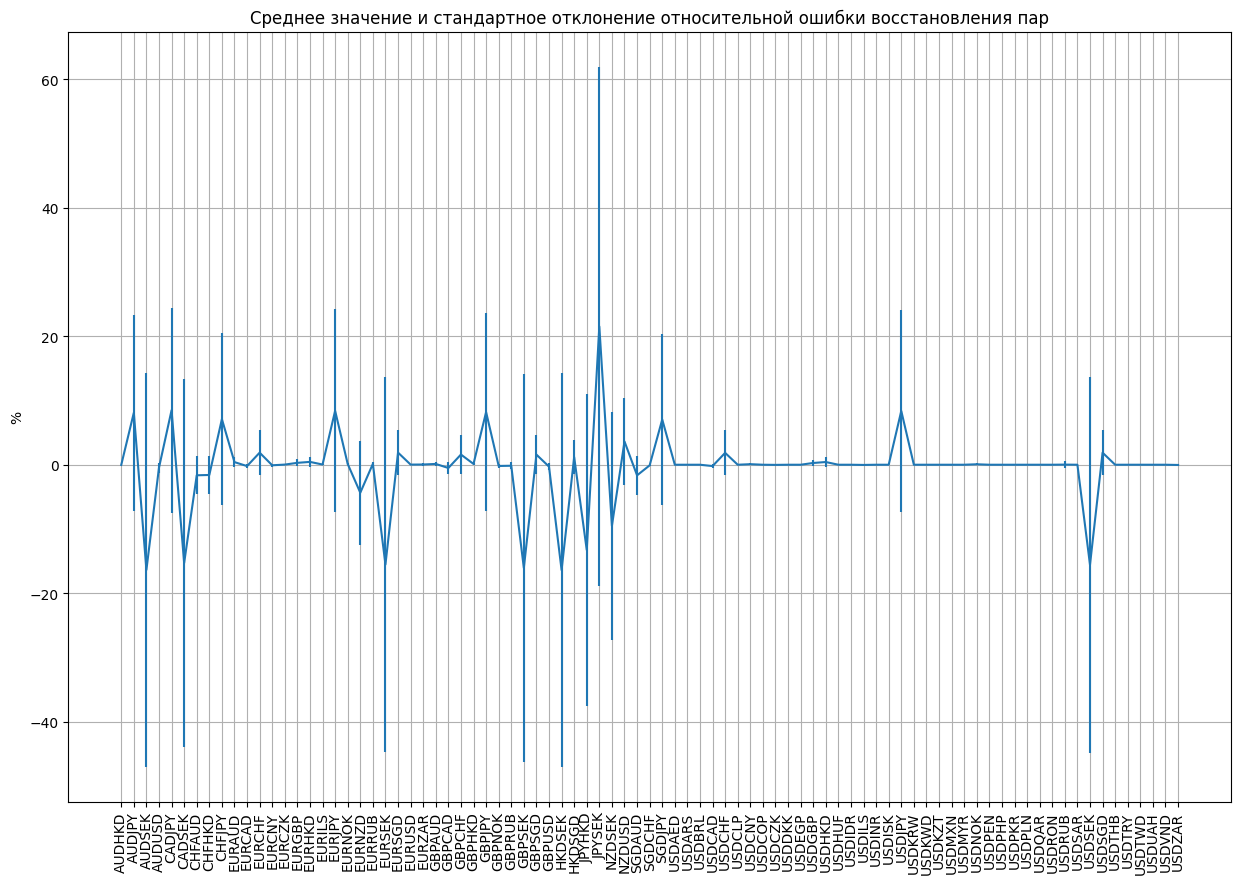

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
# bars = ax.bar(pairs_delta_stat.index, pairs_delta_stat['mean']*100, label='Mean')
plt.title("Среднее значение и стандартное отклонение относительной ошибки восстановления пар")
plt.ylabel('%')

ax.errorbar(pairs_delta_stat.index,pairs_delta_stat['mean']*100,pairs_delta_stat['std']*100)

# for i, pair in enumerate(pairs_delta_stat.index):
#     ax.errorbar(pair, pairs_delta_stat.loc[pair, 'mean']*100, yerr=pairs_delta_stat.loc[pair, 'std'], color='black', fmt='_', capsize=5, capthick=2)


ax.set_xticks(np.arange(len(pairs_delta_stat.index)))
ax.set_xticklabels(pairs_delta_stat.index, rotation=90)
ax.grid()


# Последние абсолютные валютные курсы

Собирается таблица с последними абсолютными валютными курсами закрытий всех имеющихся 45 валют, которая сохраняется в тетрадке под именем `abs_last.csv`. Все сохраненные в тетрадке файлы доступны для скачивания без ограничений. 

Таблица с абсолютными курсами валют выкладывается на листе в Google Docs по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=740234571.

Таблицы последних абсолютных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/blog-page_59.html и на сайте по адресу https://prog815.github.io/abscur2/abs_last.html.

In [14]:
abscur_last = abscur.iloc[[-1],:].T
abscur_last.index.name = "Валюты"
abscur_last.columns = ['Курс на ' + str(abscur_last.columns[0])[:10]]

# сохранем на диск
abscur_last.to_csv("abscur_last.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Последние абсолютные валютные курсы",abscur_last)

abscur_last

,Курс на 2024-02-22
Валюты,
AED,5.973837
ARS,0.026186
AUD,14.376341
BRL,4.444734
CAD,16.246816
CHF,24.940799
CLP,0.022621
CNY,3.053022
COP,0.005600


# Задаем диапазоны

In [15]:
fmt = """30	за месяц	1m
90	за квартал	1kv
180	за полгода	6m
365	за год	1y
730	за два года	2y
1095	за три года	3y
1825	за пять лет	5y
18250	за все время	all"""
fmt_diap = np.array([ln.split("\t") for ln in fmt.split("\n")])
fmt_diap

array([['30', 'за месяц', '1m'],
       ['90', 'за квартал', '1kv'],
       ['180', 'за полгода', '6m'],
       ['365', 'за год', '1y'],
       ['730', 'за два года', '2y'],
       ['1095', 'за три года', '3y'],
       ['1825', 'за пять лет', '5y'],
       ['18250', 'за все время', 'all']], dtype='<U12')

# Рейтинг абсолютной доходности валют

Доходности всех валют за разные периоды рассчитываются и складываются в файл `reit_doh.csv` и в таблицу на Google Drive по адресу
https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=680888126.

Доходность считаем по формуле:

$$
Doh = \frac{X_n - X_1}{X_1}
$$

, где $X_n$ - последнее значение в диапазоне для курса валюты, $X_1$ - первое значение в диапазоне для курса валюты.

Посмотреть результаты удобнее всего будет на сайте (см. https://prog815.github.io/abscur2/reit_doh.html) или в блоге (см. https://www.abscur.ru/p/blog-page_3.html).

In [16]:
reit_doh = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_doh.iloc[:,i] = (df.iloc[-1,:] - df.iloc[0,:]) / df.iloc[0,:]

reit_doh.index.name = "Валюта"
    
# сохранем на диск
reit_doh.to_csv("reit_doh.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Рейтинг абсолютной доходности",reit_doh)

reit_doh

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.004308,0.026978,0.023802,0.053536,0.170671,0.233746,0.264089,0.553859
ARS,-0.014832,-0.561726,-0.572342,-0.754858,-0.850230,-0.868320,-0.940901,-0.984210
AUD,0.000165,0.022222,0.047910,0.014485,0.062853,0.021077,0.161877,0.160240
BRL,0.007563,0.020021,0.010127,0.099474,0.199376,0.365475,-0.040575,-0.199716
CAD,0.001184,0.037293,0.031208,0.057238,0.107215,0.152439,0.228727,0.310291
CHF,-0.006360,0.030370,0.029388,0.115496,0.226712,0.256536,0.437618,0.564518
CLP,-0.054072,-0.081908,-0.108382,-0.130000,-0.044141,-0.101186,-0.151566,-0.045826
CNY,-0.004010,0.016066,0.031175,0.009594,0.029938,0.109561,0.180013,0.327365
COP,0.012714,0.058075,0.076445,0.315854,0.173096,0.130746,0.002324,-0.147589


# Рейтинг абсолютной волатильности валют

Волатильности всех валют за разные периоды рассчитываются и складываются в файл `reit_vol.csv` и в таблицу на Google Drive по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=758386108.

Волатильность считаем по формуле:

$$
Vol = \frac{std(X)}{mean(X)}
$$

, где $std(X)$ - стандартное отклонение для курсов валюты за некоторый период, $mean(X)$ - среднее значения для курсов валюты за некоторый период.

Посмотреть результаты удобнее всего будет на сайте (см. https://prog815.github.io/abscur2/reit_vol.html) или в блоге (см. https://www.abscur.ru/p/blog-page_26.html).

In [17]:
reit_vol = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)

for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_vol.iloc[:,i] = df.std() / df.mean() 

reit_vol.index.name = "Валюта"
    
# сохранем на диск
reit_vol.to_csv("reit_vol.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Рейтинг абсолютной волатильности",reit_vol)

reit_vol

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.002986,0.009808,0.008877,0.020361,0.037799,0.066550,0.073755,0.103991
ARS,0.004118,0.397469,0.360856,0.368471,0.426474,0.399063,0.504140,0.864393
AUD,0.003681,0.012755,0.020019,0.017418,0.018127,0.021845,0.057816,0.061461
BRL,0.003699,0.008168,0.011602,0.031613,0.052394,0.100444,0.113106,0.142320
CAD,0.002427,0.012630,0.013846,0.020430,0.021508,0.035457,0.064815,0.094690
CHF,0.006955,0.015382,0.022471,0.036001,0.070900,0.083138,0.100669,0.118098
CLP,0.020550,0.031624,0.027925,0.041504,0.058365,0.054833,0.053559,0.052512
CNY,0.002345,0.007828,0.010051,0.015520,0.014930,0.028945,0.062370,0.081391
COP,0.004799,0.016716,0.028235,0.079619,0.085942,0.071792,0.069360,0.084805


# Рейтинг валют по коэффициенту Шарпа

Коэффициенты Шарпа для всех валют за разные периоды рассчитываются и складываются в файл `reit_sharp.csv`, а также в таблицу на Google Drive по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=1774745239.

Сначала посчитаем относительные изменения абсолютных курсов по следующей формуле:
$$
X^{'}_k = \frac{X_k-X_{k-1}}{X_{k-1}}
$$

Коэффициенты Шарпа считаем по такой формуле:

$$
koefSharp = \frac{mean(X^{'})}{std(X^{'})}
$$

, где $std(X^{'})$ - стандартное отклонение для относительных изменений абсолютных курсов валюты за некоторый период, $mean(X^{'})$ - среднее значения для относительных изменений абсолютных курсов валюты за некоторый период.

Посмотреть результаты удобнее всего будет на сайте (см. https://prog815.github.io/abscur2/reit_sharp.html) или в блоге (см. https://www.abscur.ru/p/blog-page_6.html).

In [18]:
reit_sharp = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
d_abscur = abscur.pct_change()

for i in range(fmt_diap.shape[0]):
    df = d_abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_sharp.iloc[:,i] = df.mean() / df.std()

reit_sharp.index.name = "Валюта"
    
# сохранем на диск
reit_sharp.to_csv("reit_sharp.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Рейтинг валют по коэффициенту Шарпа",reit_sharp)

reit_sharp

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.107594,0.132696,0.062348,0.070241,0.086951,0.085840,0.060443,0.062068
ARS,-0.283640,-0.125942,-0.092437,-0.116607,-0.115890,-0.101684,-0.104870,-0.095730
AUD,0.036327,0.073483,0.076289,0.007953,0.022952,0.008659,0.023972,0.013901
BRL,0.154784,0.049326,0.016635,0.058062,0.041513,0.042562,0.001600,-0.004333
CAD,0.057912,0.177272,0.074197,0.067989,0.053875,0.052083,0.046859,0.030570
CHF,-0.078375,0.114316,0.063968,0.107911,0.088316,0.073287,0.070514,0.027991
CLP,-0.336380,-0.136775,-0.088372,-0.055211,-0.002341,-0.009008,-0.009905,0.000636
CNY,0.002670,0.080289,0.081327,0.012724,0.017674,0.042379,0.041716,0.034912
COP,0.027503,0.138891,0.071723,0.121907,0.034981,0.020389,0.003766,-0.003850


# Сохранение истории данных

In [19]:
# Имя каталога
directory_name = 'history'

# Проверяем существование каталога
if not os.path.exists(directory_name):
    # Создаем каталог, если он не существует
    os.makedirs(directory_name)
    print(f'Каталог {directory_name} успешно создан.')
else:
    print(f'Каталог {directory_name} уже существует.')
    
# Имя основного каталога
base_directory = directory_name

# Формат даты для подкаталога
date_format = '%Y-%m-%d'

# Получаем текущую дату
current_date = datetime.now().strftime(date_format)

# Полный путь к подкаталогу
subdirectory_path = os.path.join(base_directory, current_date)

# Проверяем существование подкаталога
if not os.path.exists(subdirectory_path):
    # Создаем подкаталог, если он не существует
    os.makedirs(subdirectory_path)
    print(f'Подкаталог {subdirectory_path} успешно создан.')
else:
    print(f'Подкаталог {subdirectory_path} уже существует.')
    
# Копируем файлы типа CSV
csv_files = [file for file in os.listdir('.') if file.endswith('.csv')]
for csv_file in csv_files:
    shutil.copy2(csv_file, subdirectory_path)
    print(f'Файл {csv_file} успешно скопирован.')

# Копируем папку "pairs"
pairs_folder = 'pairs'
if os.path.exists(pairs_folder):
    shutil.rmtree(os.path.join(subdirectory_path, pairs_folder), ignore_errors=True)
    shutil.copytree(pairs_folder, os.path.join(subdirectory_path, pairs_folder))
    print(f'Папка {pairs_folder} успешно скопирована.')
else:
    print(f'Папка {pairs_folder} не найдена.')

Каталог history успешно создан.
Подкаталог history/2024-02-22 успешно создан.
Файл abscur_last.csv успешно скопирован.
Файл pairs_delta.csv успешно скопирован.
Файл reit_vol.csv успешно скопирован.
Файл reit_sharp.csv успешно скопирован.
Файл reit_doh.csv успешно скопирован.
Файл abscur.csv успешно скопирован.
Файл pairs_last.csv успешно скопирован.
Файл pairs_delta_stat.csv успешно скопирован.
Файл pairs_close.csv успешно скопирован.
Папка pairs успешно скопирована.
